In [1]:
#Importing the neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#We use some methods from sklearn module for modeling
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
#Importing Data
dataset=pd.read_csv("C:/Users/PC/OneDrive/Documents/My project/PROJECT DATA(1).csv")

In [4]:
dataset.head()

,YEARS,GDP GROWTH RATES,EXCHANGE RATES,CPI RATES,LENDING RATES,INFLATION RATES
0,1971,22.17,7.14,0.93,9.0,3.78
1,1972,17.08,7.14,0.98,9.0,5.83
2,1973,5.90,7.00,1.07,9.0,9.28
3,1974,4.07,7.14,1.26,9.5,17.81
4,1975,0.88,7.34,1.50,10.0,19.12


In [5]:
dataset.tail()

,YEARS,GDP GROWTH RATES,EXCHANGE RATES,CPI RATES,LENDING RATES,INFLATION RATES
47,2018,5.65,101.30,180.51,13.06,4.69
48,2019,5.11,101.99,189.97,12.44,5.24
49,2020,-0.27,106.45,200.23,12.00,5.40
50,2021,7.59,109.64,212.47,12.08,6.11
51,2022,4.85,117.87,228.74,12.34,7.66


In [6]:
#Showing the number of rows and columns
dataset.shape

(52, 6)

In [7]:
#cheking for missing values and duplicated values
print(dataset.isnull().sum())
print("-------------------------------")
print(dataset.duplicated().sum())

YEARS                0
GDP GROWTH  RATES    0
EXCHANGE RATES       0
CPI RATES            0
LENDING RATES        0
INFLATION RATES      0
dtype: int64
-------------------------------
0


# DESCRIPTIVE STATISTICS

In [8]:
#Descriptive statistics
dataset.describe()

,YEARS,GDP GROWTH RATES,EXCHANGE RATES,CPI RATES,LENDING RATES,INFLATION RATES
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,1996.500000,4.599423,52.343654,57.376538,16.301923,11.505962
std,15.154757,3.875853,36.625405,67.618047,6.524063,7.880084
min,1971.000000,-0.800000,7.000000,0.930000,9.000000,1.550000
25%,1983.750000,2.270000,14.135000,4.472500,12.400000,6.252500
50%,1996.500000,4.255000,58.365000,29.125000,14.395000,9.790000
75%,2009.250000,5.902500,79.185000,97.142500,18.525000,13.900000
max,2022.000000,22.170000,117.870000,228.740000,36.240000,45.980000


In [9]:
#Checking for dependency in the variables
dataset.corr()

,YEARS,GDP GROWTH RATES,EXCHANGE RATES,CPI RATES,LENDING RATES,INFLATION RATES
YEARS,1.000000,-0.246014,0.971440,0.901297,0.170718,-0.258990
GDP GROWTH RATES,-0.246014,1.000000,-0.208775,-0.060637,-0.410359,-0.365845
EXCHANGE RATES,0.971440,-0.208775,1.000000,0.880911,0.215479,-0.267219
CPI RATES,0.901297,-0.060637,0.880911,1.000000,-0.099706,-0.326981
LENDING RATES,0.170718,-0.410359,0.215479,-0.099706,1.000000,0.261539
INFLATION RATES,-0.258990,-0.365845,-0.267219,-0.326981,0.261539,1.000000


In [10]:
dataset.columns

Index(['YEARS', 'GDP GROWTH  RATES', 'EXCHANGE RATES', 'CPI RATES',
       'LENDING RATES', 'INFLATION RATES '],
      dtype='object')

In [11]:
#Correcting the variable names
dataset.columns = dataset.columns.str.replace(' ', '_')

In [12]:
dataset.head()

,YEARS,GDP_GROWTH__RATES,EXCHANGE_RATES,CPI_RATES,LENDING_RATES,INFLATION_RATES_
0,1971,22.17,7.14,0.93,9.0,3.78
1,1972,17.08,7.14,0.98,9.0,5.83
2,1973,5.90,7.00,1.07,9.0,9.28
3,1974,4.07,7.14,1.26,9.5,17.81
4,1975,0.88,7.34,1.50,10.0,19.12


### 1. Separating variables from the dataset by creating new variables

In [13]:
#Separating variables from the dataset by creating new variables
#This method is better with visualizations
GDP_GROWTH__RATES=dataset.GDP_GROWTH__RATES
EXCHANGE_RATES=dataset.GDP_GROWTH__RATES
CPI_RATES=dataset.CPI_RATES
LENDING_RATES=dataset.LENDING_RATES
INFLATION_RATES=dataset.INFLATION_RATES_

Text(0.5, 1.0, 'Histogram of Values')

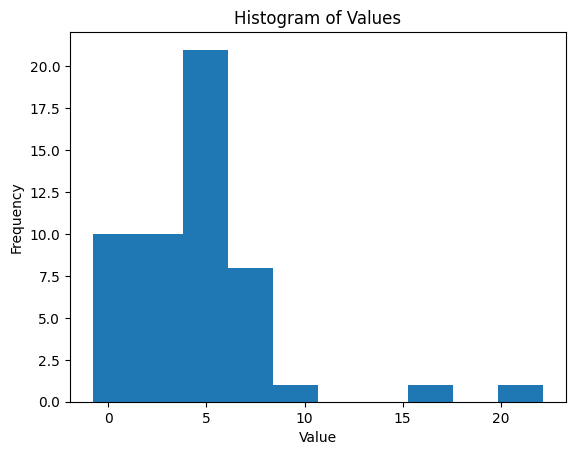

In [14]:
#Histogram visualization for 1 variable
dataset.GDP_GROWTH__RATES.hist(grid = False)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Values')

### 2. Separating variables from the dataset by creating lists(we use this in our analysis)

In [15]:
#Separating variables from the dataset by creating lists
X=dataset[['GDP_GROWTH__RATES','EXCHANGE_RATES','CPI_RATES','LENDING_RATES']]
Y=dataset['INFLATION_RATES_']

In [16]:
X

,GDP_GROWTH__RATES,EXCHANGE_RATES,CPI_RATES,LENDING_RATES
0,22.17,7.14,0.93,9.00
1,17.08,7.14,0.98,9.00
2,5.90,7.00,1.07,9.00
3,4.07,7.14,1.26,9.50
4,0.88,7.34,1.50,10.00
5,2.15,8.37,1.68,10.00
6,9.45,8.28,1.92,10.00
7,6.91,7.73,2.25,10.00
8,7.62,7.48,2.43,10.00
9,5.59,7.42,2.77,10.58


In [17]:
Y

0      3.78
1      5.83
2      9.28
3     17.81
4     19.12
5     11.45
6     14.82
7     16.93
8      7.98
9     13.86
10    11.60
11    20.67
12    11.40
13    10.28
14    13.01
15     2.53
16     8.64
17    12.26
18    13.79
19    17.78
20    20.08
21    27.33
22    45.98
23    28.81
24     1.55
25     8.86
26    11.36
27     6.72
28     5.74
29     9.98
30     5.74
31     1.96
32     9.82
33    11.62
34    10.31
35    14.45
36     9.76
37    26.24
38     9.23
39     3.96
40    14.02
41     9.38
42     5.72
43     6.88
44     6.58
45     6.30
46     8.01
47     4.69
48     5.24
49     5.40
50     6.11
51     7.66
Name: INFLATION_RATES_, dtype: float64

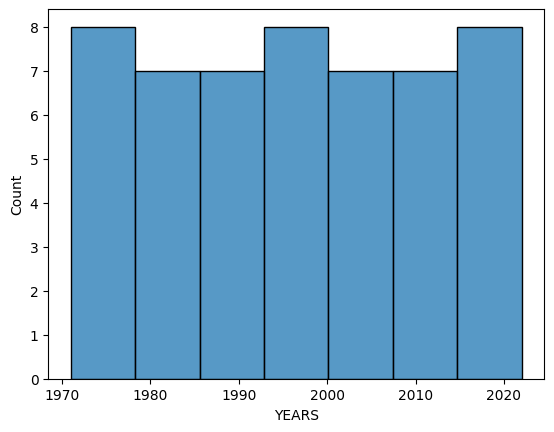

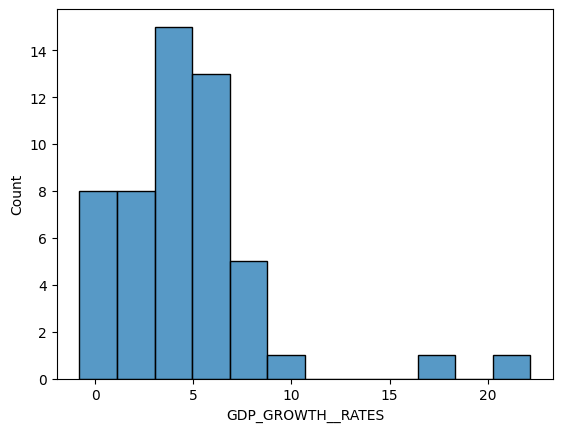

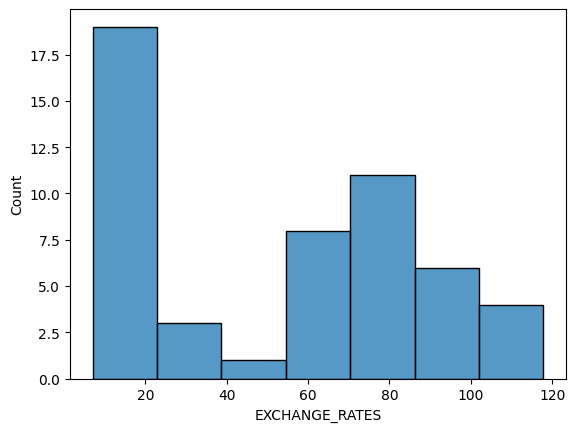

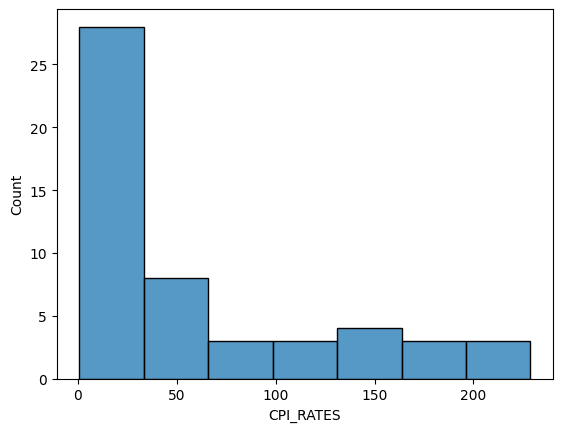

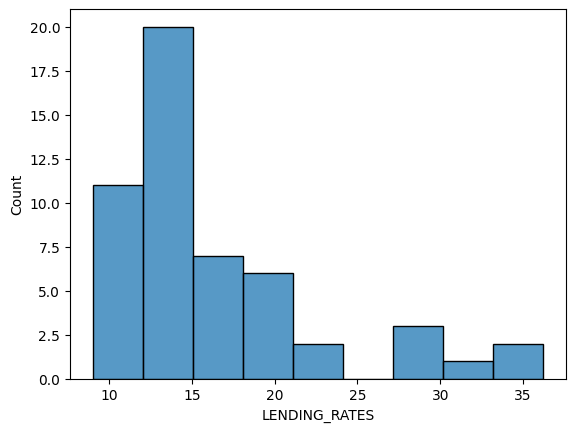

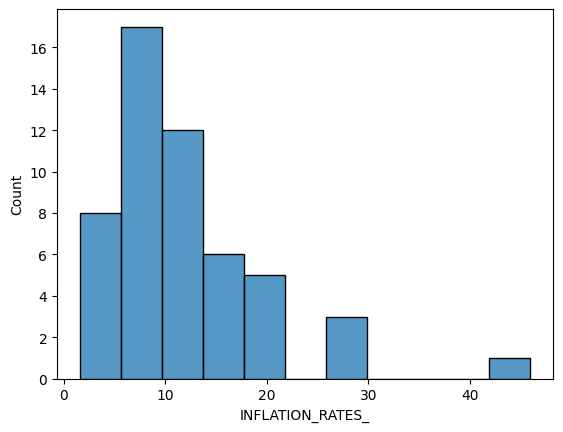

In [18]:
#Histogram for the variables in a list.
#This code can be used to visualize histograms for the whole dataset provided the values are numbers
for i in dataset.select_dtypes(include="number").columns:
    sns.histplot(data=dataset, x=i)
    plt.show()

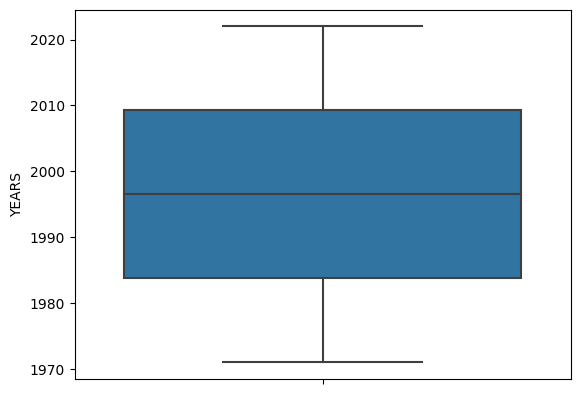

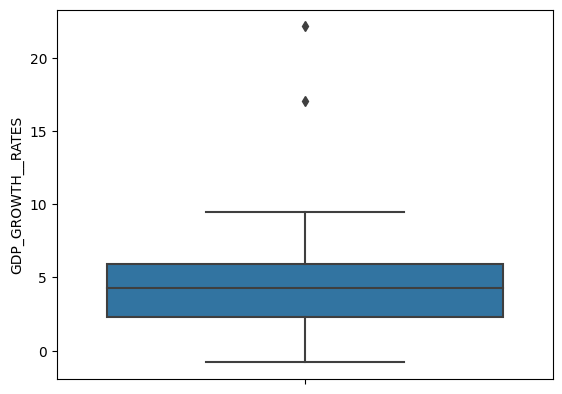

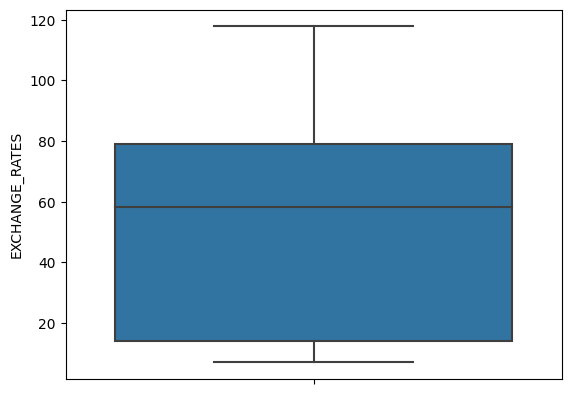

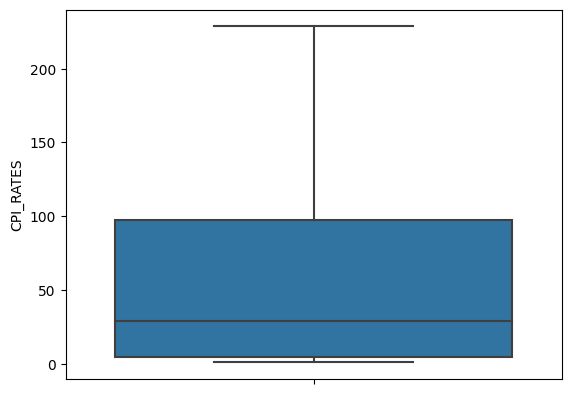

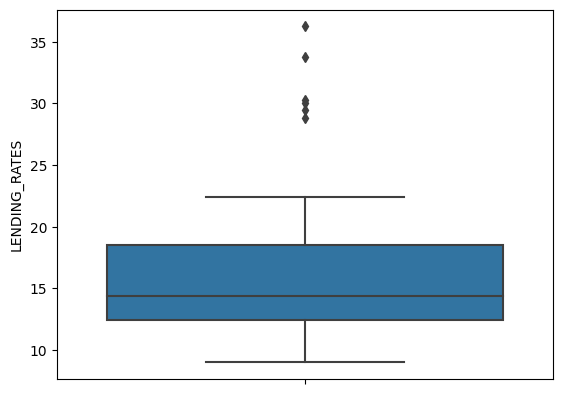

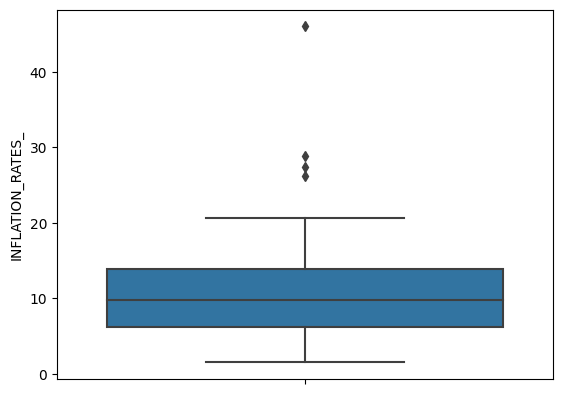

In [19]:
for i in ['YEARS', 'GDP_GROWTH__RATES', 'EXCHANGE_RATES', 'CPI_RATES',
       'LENDING_RATES', 'INFLATION_RATES_']:
    sns.boxplot(data=dataset, y=i)
    plt.show()

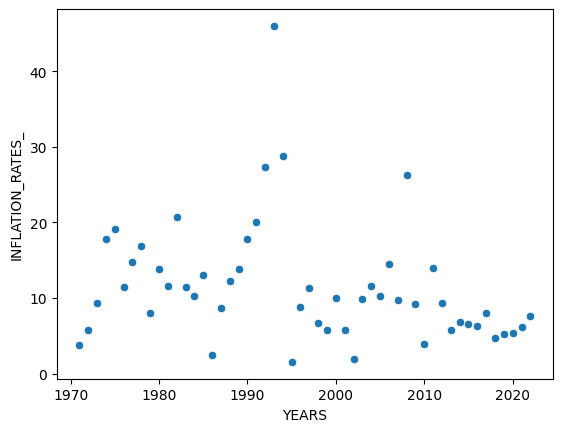

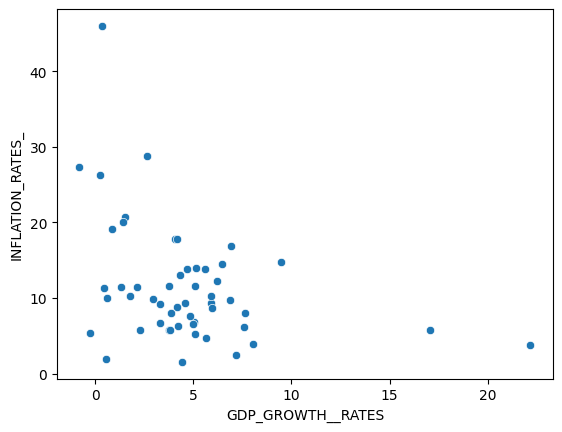

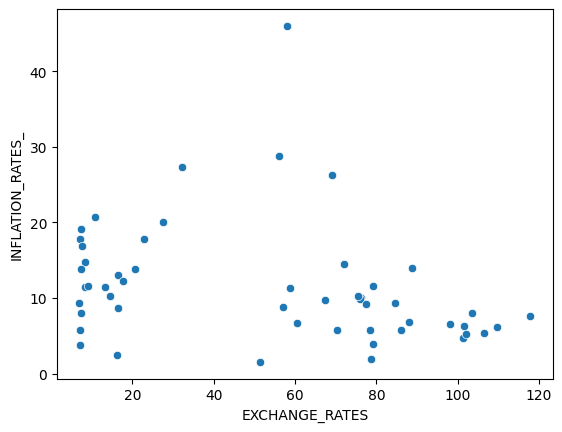

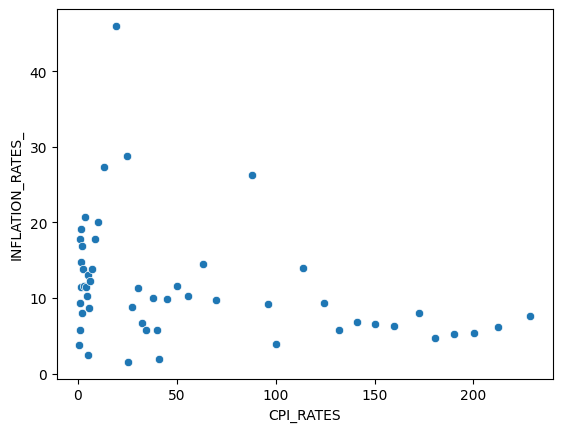

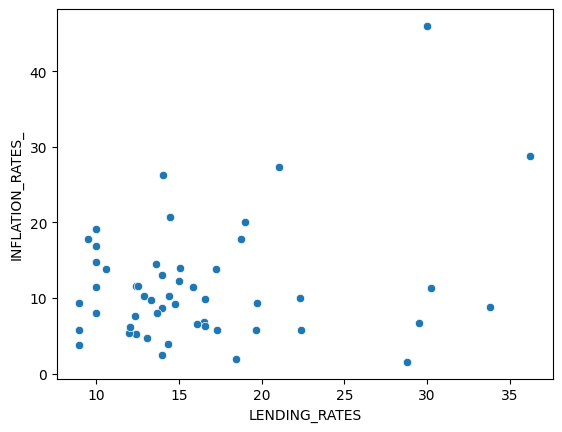

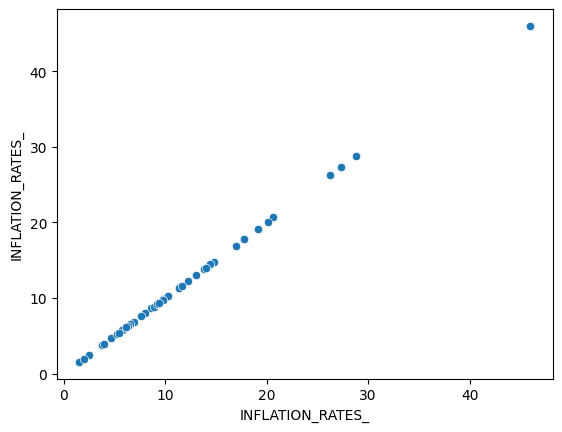

In [20]:
#Scatterplot for variables in a list
for i in ['YEARS', 'GDP_GROWTH__RATES', 'EXCHANGE_RATES', 'CPI_RATES',
       'LENDING_RATES', 'INFLATION_RATES_']:
    sns.scatterplot(data=dataset, x=i,y='INFLATION_RATES_')
    plt.show()

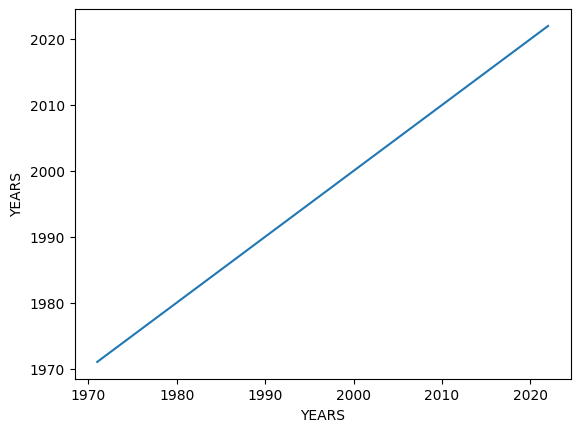

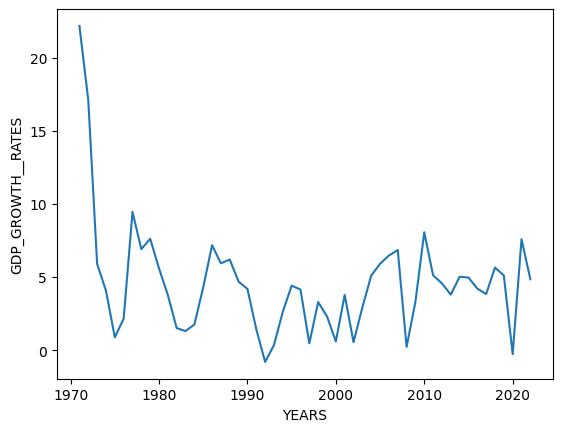

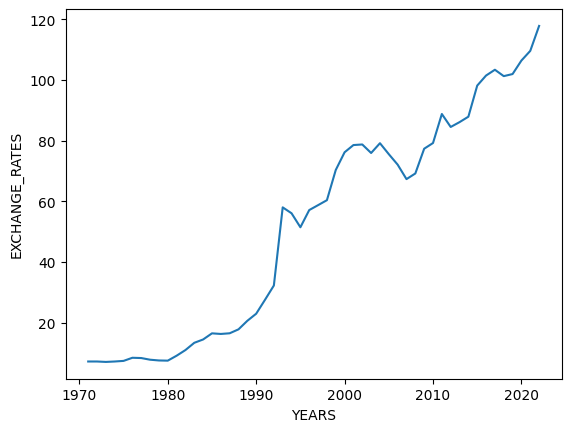

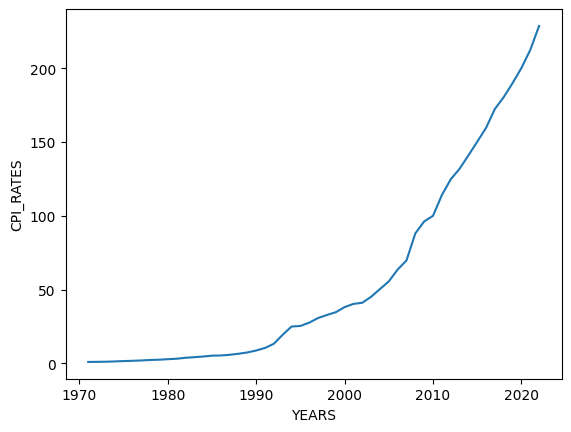

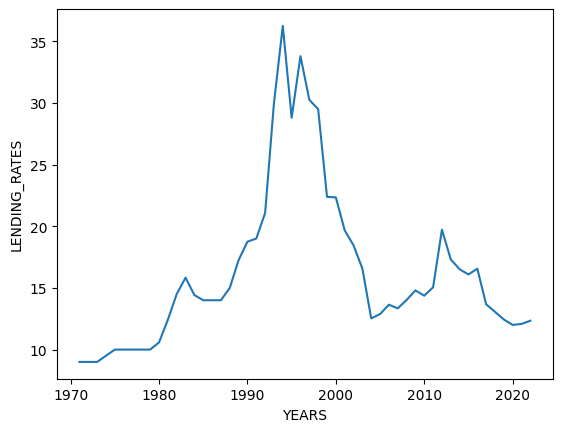

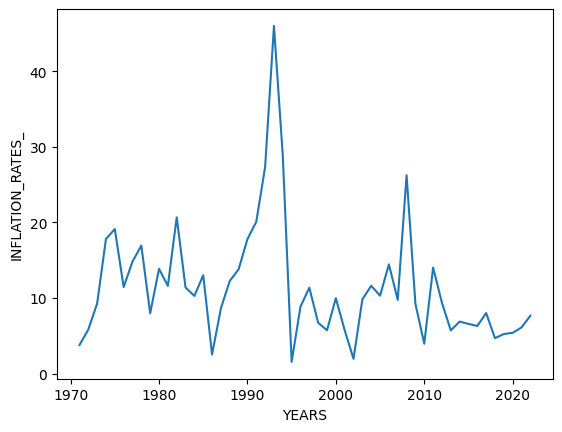

In [21]:
for i in ['YEARS', 'GDP_GROWTH__RATES', 'EXCHANGE_RATES', 'CPI_RATES',
       'LENDING_RATES', 'INFLATION_RATES_']:
    sns.lineplot(data=dataset, x="YEARS",y=i)
    plt.show()

# MODEL BUILDING

In [22]:
#Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)

In [23]:
Y_train.shape

(41,)

In [24]:
Y_test.shape

(11,)

In [25]:
#fitting the linear regression model
reg_model = linear_model.LinearRegression()
reg_model=LinearRegression().fit(X_train,Y_train)
reg_model

LinearRegression()

In [ ]:
# Model equation
equation = f'y = {intercept}'
for i, coef in enumerate(coefficients):
    equation += f' + {coef:.2f} * feature{i+1}'

print("Model equation:", equation)

In [26]:
#printing model coeeficients
print('Intercept: ', reg_model.intercept_)
#Pairing the ind.variables names with their coefficients
list(zip(X, reg_model.coef_))

Intercept:  12.538005794721201


[('GDP_GROWTH__RATES', -0.7768810320507543),
 ('EXCHANGE_RATES', -0.16793117537246532),
 ('CPI_RATES', 0.04244579673321732),
 ('LENDING_RATES', 0.5458852040760549)]

In [27]:
#predicting the test and train set result
Y_Pred=reg_model.predict(X_test)
X_Pred=reg_model.predict(X_train)

In [28]:
print("Prediction for test set :{}".format(Y_Pred))

Prediction for test set :[ 9.34635788  8.46824972  9.13901537  5.54705234  4.25746439  5.42136011
 14.99228862 20.12596271 19.33866729  8.03865278  6.29508309]


In [29]:
reg_model_diff=pd.DataFrame({'Actual value' : Y_test,'Predicted value' :Y_Pred})
reg_model_diff

,Actual value,Predicted value
6,14.82,9.346358
32,9.82,8.468250
38,9.23,9.139015
35,14.45,5.547052
33,11.62,4.257464
51,7.66,5.421360
5,11.45,14.992289
26,11.36,20.125963
25,8.86,19.338667
45,6.30,8.038653


In [30]:
mae = metrics.mean_absolute_error(Y_test,Y_Pred)
mse = metrics.mean_squared_error(Y_test,Y_Pred)
R2 = np.sqrt(metrics.mean_squared_error(Y_test,Y_Pred))
print("Mean Absolute error :", mae)
print("Mean Squared Error :", mae)
print("Root mean Squared error :", mae)

Mean Absolute error : 4.636468605949196
Mean Squared Error : 4.636468605949196
Root mean Squared error : 4.636468605949196


# INTERPRETATION
Mean Absolute Error (MAE):
The Mean Absolute Error (MAE) of approximately 4.636 indicates that, on average, the model's predictions differ from the actual values by about 4.636 units. Lower MAE values signify better accuracy.

Mean Squared Error (MSE):
With a Mean Squared Error (MSE) of approximately 4.636, the model's predictions exhibit an average squared deviation of 4.636 units from the actual values.Lower MSE values signify better accuracy.

Root Mean Squared Error (RMSE):
The Root Mean Squared Error (RMSE) of approximately 4.636 represents the square root of the MSE, offering insight into the average magnitude of prediction errors in the original units of the data

## User interface

In [38]:
# GDP_GROWTH__RATES = float(input("Enter the ANNUAL GDP_GROWTH__RATES: "))  # Convert to float for consistency
GDP_GROWTH__RATES = float(input('Enter the ANNUAL GDP_GROWTH__RATES: '))
EXCHANGE_RATES = float(input("Enter the ANNUAL EXCHANGE_RATES: "))
CPI_RATES = float(input("Enter the ANNUAL CPI_RATES: "))
LENDING_RATES = float(input('Enter the ANNUAL LENDING_RATES: '))

# Create a dictionary with input values
input_data = {
    'GDP_GROWTH__RATES': [GDP_GROWTH__RATES],
    'EXCHANGE_RATES': [EXCHANGE_RATES],
    'CPI_RATES': [CPI_RATES],
    'LENDING_RATES': [LENDING_RATES]
    }

# Convert the dictionary to a DataFrame and then access the values
input_df = pd.DataFrame.from_dict(input_data)

# Predict using the model
INFLATION=12.538-(0.76881*GDP_GROWTH__RATES)-(0.1679*EXCHANGE_RATES)+(0.042445*CPI_RATES)+(0.545885*LENDING_RATES)

# Print the predicted weather
print("The Annual inflation rate is: ",INFLATION)
if INFLATION>=25:
    print('ECONOMIC HAZARD!!! : CHANGE THE GOVERNMENT POLICIES')
else:
    print('LIMIT NOT SURPASSED')

Enter the ANNUAL GDP_GROWTH__RATES:  1
Enter the ANNUAL EXCHANGE_RATES:  50
Enter the ANNUAL CPI_RATES:  250
Enter the ANNUAL LENDING_RATES:  35


The Annual inflation rate is:  33.091415
ECONOMIC HAZARD : CHANGE THE GOVERNMENT POLICIES
